In [1]:
import csv
from datetime import datetime
import json

with open('/resources/labs/DA0101EN/facial_similarity_reports.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    with open('/resources/labs/DA0101EN/facial_similarity_reports_out.csv', 'w', newline='') as csvfile:
        fieldnames = ['user_id', 'result', 'face_comparison_result', 'created_at','created_date', 'created_year', 'created_month', 'created_day', 'created_hour', 'facial_image_integrity_result','visual_authenticity_result','properties','score','attempt_id']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in reader:
            datereader = datetime.strptime(row['created_at'], '%Y-%m-%dT%H:%M:%SZ')    
            properties = json.loads(row['properties'].replace("\'", "\""))
            if(properties == {}):
                properties['score'] = 0

            writer.writerow({
                             'user_id': row['user_id'],
                             'result': row['result'], 
                             'face_comparison_result': row['face_comparison_result'], 
                             'created_at': str(datereader), 
                             'created_date': str(datereader.date()),
                             'created_year': str(datereader.year), 
                             'created_month': str(datereader.month), 
                             'created_day': str(datereader.day), 
                             'created_hour': str(datereader.time()), 
                             'facial_image_integrity_result': row['facial_image_integrity_result'],
                             'visual_authenticity_result': row['visual_authenticity_result'],
                             'properties': row['properties'],
                             'score': properties['score'] if 'score' in properties else '',
                             'attempt_id' : row['attempt_id']
                            })

In [2]:
import csv
from datetime import datetime
import json

with open('/resources/labs/DA0101EN/doc_reports.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    with open('/resources/labs/DA0101EN/doc_reports_out.csv', 'w', newline='') as csvfile:
        fieldnames = ['user_id','result','visual_authenticity_result','image_integrity_result','face_detection_result', 'image_quality_result','created_at','created_date', 'created_year', 'created_month', 'created_day', 'created_hour', 'supported_document_result','conclusive_document_quality_result','colour_picture_result','data_validation_result','data_consistency_result','data_comparison_result','attempt_id','police_record_result','compromised_document_result','properties','gender','nationality','document_type','date_of_expiry','issuing_date','issuing_country','sub_result']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in reader:
            datereader = datetime.strptime(row['created_at'], '%Y-%m-%dT%H:%M:%SZ')
            properties = json.loads(row['properties'].replace("\'", "\"").replace("None", "\"None\""))
            if(properties == {}):
                properties['gender'] = ''
                properties['nationality'] = ''
                properties['document_type'] = ''
                properties['date_of_expiry'] = ''
                properties['issuing_country'] = ''      
        
            writer.writerow({ 
                             'user_id': row['user_id'],
                             'result': row['result'], 
                             'visual_authenticity_result': row['visual_authenticity_result'], 
                             'image_integrity_result': row['image_integrity_result'],
                             'face_detection_result': row['face_detection_result'],
                             'image_quality_result': row['image_quality_result'],
                             'created_at': str(datereader), 
                             'created_date': str(datereader.date()), 
                             'created_year': str(datereader.year), 
                             'created_month': str(datereader.month), 
                             'created_day': str(datereader.day), 
                             'created_hour': str(datereader.time()), 
                             'supported_document_result': row['supported_document_result'],
                             'conclusive_document_quality_result': row['conclusive_document_quality_result'],
                             'colour_picture_result': row['colour_picture_result'],
                             'data_validation_result': row['data_validation_result'],
                             'data_consistency_result': row['data_consistency_result'],
                             'data_comparison_result': row['data_comparison_result'],
                             'attempt_id': row['attempt_id'],
                             'police_record_result': row['police_record_result'],
                             'compromised_document_result': row['compromised_document_result'],
                             'properties': row['properties'],
                             'gender': properties['gender'] if 'gender' in properties else '',
                             'nationality': properties['nationality'] if 'nationality' in properties else '',
                             'document_type': properties['document_type'] if 'document_type' in properties else '',
                             'date_of_expiry': properties['date_of_expiry'] if 'date_of_expiry' in properties else '',
                             'issuing_date': properties['issuing_date'] if 'issuing_date' in properties else '',
                             'issuing_country': properties['issuing_country'] if 'issuing_country' in properties else '',
                             'sub_result' : row['sub_result']
                            })

In [3]:
import numpy as np
import pandas as pd

documents = pd.read_csv('/resources/labs/DA0101EN/doc_reports_out.csv')
facial = pd.read_csv('/resources/labs/DA0101EN/facial_similarity_reports_out.csv')

df = pd.merge(documents,facial, on=["user_id","attempt_id"], how='inner', indicator=True)
df["result_final"] = np.where((df['result_x']=="clear") & (df['result_y']=="clear"), 'clear', 'consider')

dfInnerJoin = df[["user_id",
                  "attempt_id",
                  "result_final",
                  "face_comparison_result",
                  "facial_image_integrity_result",
                  "visual_authenticity_result_x",
                  "visual_authenticity_result_y",
                  "image_integrity_result",
                  "face_detection_result",
                  "image_quality_result",
                  "supported_document_result",
                  "conclusive_document_quality_result",
                  "colour_picture_result",
                  "data_validation_result",
                  "data_consistency_result",
                  "data_comparison_result",
                  "police_record_result",
                  "compromised_document_result",
                  "gender",
                  "nationality",
                  "document_type",
                  "created_at_y"
          ]].copy()


dfInnerJoin['created_at_y'] = pd.to_datetime(df['created_at_y']) 
dfInnerJoin['created_month'] = dfInnerJoin['created_at_y'].dt.month
dfInnerJoin = dfInnerJoin.rename(columns={'created_at_y': 'created_at'})
dfInnerJoin = dfInnerJoin.rename(columns={'visual_authenticity_result_x': 'visual_authenticity_result_facial'})
dfInnerJoin = dfInnerJoin.rename(columns={'visual_authenticity_result_y': 'visual_authenticity_result_doc'})

dfInnerJoin.to_csv("/resources/labs/DA0101EN/InneJoinAllData.csv",index=False)

In [4]:
import numpy as np
import pandas as pd

dfInnerJoin = pd.read_csv('/resources/labs/DA0101EN/InneJoinAllData.csv').drop_duplicates(subset=dfInnerJoin.columns.difference(['attempt_id']))

dfAttempts = dfInnerJoin.groupby(["user_id"])["attempt_id"].count().reset_index(name="attempt_qty")
dfFinal = dfInnerJoin.sort_values('created_at').groupby('user_id').tail(1)

dfMerge = pd.merge(dfAttempts[["user_id","attempt_qty"]],dfFinal[["user_id","result_final",
                  "face_comparison_result",
                  "facial_image_integrity_result",
                  "visual_authenticity_result_facial",
                  "visual_authenticity_result_doc",
                  "image_integrity_result",
                  "face_detection_result",
                  "image_quality_result",
                  "supported_document_result",
                  "conclusive_document_quality_result",
                  "colour_picture_result",
                  "data_validation_result",
                  "data_consistency_result",
                  "data_comparison_result",
                  "police_record_result",
                  "compromised_document_result",
                  "gender",
                  "nationality",
                  "document_type","created_at","created_month"]], on=["user_id"], how='inner')


dfMerge.to_csv("/resources/labs/DA0101EN/FinalFile.csv",index=False)

In [5]:
missing_data = dfMerge.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

user_id
False    142723
Name: user_id, dtype: int64

attempt_qty
False    142723
Name: attempt_qty, dtype: int64

result_final
False    142723
Name: result_final, dtype: int64

face_comparison_result
False    138418
True       4305
Name: face_comparison_result, dtype: int64

facial_image_integrity_result
False    142485
True        238
Name: facial_image_integrity_result, dtype: int64

visual_authenticity_result_facial
False    131767
True      10956
Name: visual_authenticity_result_facial, dtype: int64

visual_authenticity_result_doc
False    131767
True      10956
Name: visual_authenticity_result_doc, dtype: int64

image_integrity_result
False    142722
True          1
Name: image_integrity_result, dtype: int64

face_detection_result
False    131744
True      10979
Name: face_detection_result, dtype: int64

image_quality_result
False    142722
True          1
Name: image_quality_result, dtype: int64

supported_document_result
False    142462
True        261
Name: supported_document_r

In [6]:
import numpy as np
import pandas as pd

dfFinalFile = pd.read_csv('/resources/labs/DA0101EN/FinalFile.csv')
#dfPassRateByMonth = dfFinalFile.groupby(dfFinalFile['created_month'])['result_final'].count().sort_values()
dfPassRateByMonth = dfFinalFile.groupby(['created_month', 'result_final']).size().reset_index(name='count').sort_values(by =['created_month','result_final'], ascending=True) 

dfPassRateByMonth.to_csv("/resources/labs/DA0101EN/PassRateByMonth.csv",index=False)



In [7]:
import numpy as np
import pandas as pd

dfPassRateByMonth = pd.read_csv('/resources/labs/DA0101EN/PassRateByMonth.csv')

pivotTableDF = dfPassRateByMonth.filter(items=['created_month',
                                             'result_final',
                                             'count'])
pivotTableDF = pd.pivot_table(dfPassRateByMonth,
                              index='result_final',
                              columns='created_month',
                              values='count',
                              aggfunc=np.sum,
                              margins=True)
pivotTableDF.sort_values(by=['All'],inplace=True,ascending=False)

pivotTableDF.to_csv("pivotTablePassRate.csv",index=False)

In [8]:
import numpy as np
import pandas as pd

dfFinalFile = pd.read_csv('/resources/labs/DA0101EN/FinalFile.csv')

dfConsiderFilter = dfFinalFile["result_final"]!="clear"
dfConsider = dfFinalFile[dfConsiderFilter]

dfConsider.to_csv("/resources/labs/DA0101EN/Considers.csv",index=False)


In [9]:
data = {'Name': ['face_comparison_result', 
                 'facial_image_integrity_result', 
                 'visual_authenticity_result', 
                 'image_integrity_result', 
                 'face_detection_result', 
                 'image_quality_result', 
                 'supported_document_result', 
                 'conclusive_document_quality_result', 
                 'colour_picture_result', 
                 'data_validation_result', 
                 'data_consistency_result', 
                 'data_comparison_result', 
                 'police_record_result', 
                 'compromised_document_result'], 
        'consider': 
        [dfConsider['face_comparison_result'].value_counts()['consider'],
         dfConsider['facial_image_integrity_result'].value_counts()['consider'],  
         dfConsider['visual_authenticity_result_facial'].value_counts()['consider'],
         dfConsider['image_integrity_result'].value_counts()['consider'], 
         dfConsider['face_detection_result'].value_counts()['consider'], 
         dfConsider['image_quality_result'].value_counts()['unidentified'], 
         dfConsider['supported_document_result'].value_counts()['unidentified'], 
         dfConsider['conclusive_document_quality_result'].value_counts()['consider'], 
         dfConsider['colour_picture_result'].value_counts()['consider'], 
         dfConsider['data_validation_result'].value_counts()['consider'], 
         dfConsider['data_consistency_result'].value_counts()['consider'], 
         dfConsider['data_comparison_result'].value_counts()['consider'], 
         dfConsider['police_record_result'].value_counts()['consider'], 
         dfConsider['compromised_document_result'].value_counts()['consider']]
}

dfconsideranalysis = pd.DataFrame(data)
dfconsideranalysis.to_csv("/resources/labs/ConsiderAnalysis.csv",index=False)

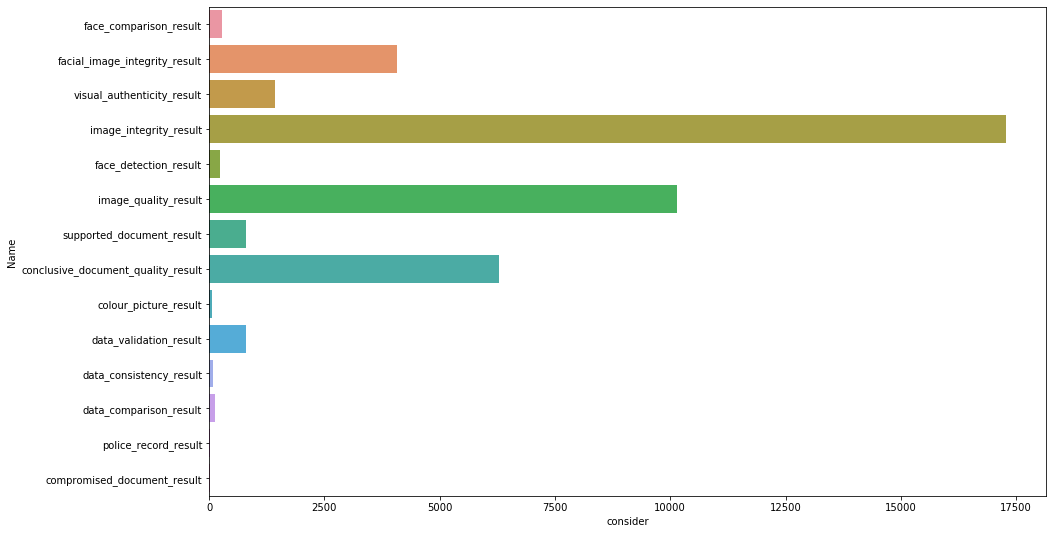

In [10]:
import matplotlib.pyplot as plot
import seaborn 
%matplotlib inline

plot.figure(figsize=(15,9))
plot = seaborn.barplot(x='consider',y='Name', data=dfconsideranalysis)

In [11]:
data = {'Attempt': ['1', 
                    '2', 
                    '3'], 
        'qty': 
        [dfConsider['attempt_qty'].value_counts()[1],
         dfConsider['attempt_qty'].value_counts()[2],
         dfConsider['attempt_qty'].value_counts()[1]]}
      
dfAttempt = pd.DataFrame(data)

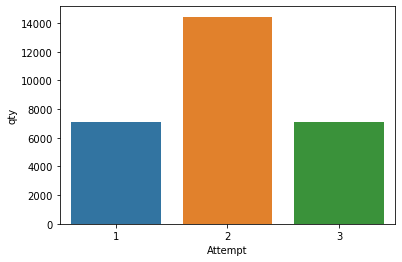

In [12]:
import matplotlib.pyplot as plot
import seaborn 
%matplotlib inline

# 32% perform 1 attempt
# Recommend re-marketing or improve UX

#plot.figure(figsize=(15,9))
plot = seaborn.barplot(x='Attempt',y='qty', data=dfAttempt)

In [13]:
import numpy as np
import pandas as pd

dfConsiders = pd.read_csv('/resources/labs/DA0101EN/Considers.csv')
dfReasonConsiderTotal = dfConsiders.groupby('created_month').apply(lambda x: pd.Series(dict(
    created_month=x.created_month.mean(),
    total_user=(x.user_id).count(),
    oneAttempt=(x.attempt_qty == 1).sum(),
    twoOrMoreAttempt=(x.attempt_qty > 1).sum(),
    face_comparison=(x.face_comparison_result == 'consider').sum(),
    facial_image_integrity=(x.facial_image_integrity_result == 'consider').sum(),
    visual_authenticity_facial=(x.visual_authenticity_result_facial == 'consider').sum(),
    visual_authenticity_doc=(x.visual_authenticity_result_doc == 'consider').sum(),
    image_integrity=(x.image_integrity_result == 'consider').sum(),
    face_detection=(x.face_detection_result == 'consider').sum(),
    image_quality=(x.image_quality_result == 'unidentified').sum(),
    supported_document=(x.supported_document_result == 'consider').sum(),
    conclusive_document=(x.conclusive_document_quality_result == 'consider').sum(),
    colour_picture=(x.colour_picture_result == 'consider').sum(),
    data_validation=(x.data_validation_result == 'consider').sum(),
    data_comparison=(x.data_comparison_result == 'consider').sum(),
    police_record=(x.police_record_result == 'consider').sum(),
    compromised_document=(x.compromised_document_result == 'consider').sum()
)))
dfReasonConsiderTotal = dfReasonConsiderTotal.apply(pd.to_numeric, downcast='integer')
dfReasonConsiderTotal.to_csv("ReasonConsidersTotal.csv",index=False)


dfReasonConsiderPercentage = dfConsiders.groupby('created_month').apply(lambda x: pd.Series(dict(
    created_month=x.created_month.mean(),
    total_user=(x.user_id).count().round(2),
    oneAttempt=(((x.attempt_qty == 1).sum()/(x.user_id).count())).round(2),
    twoOrMoreAttempt=(((x.attempt_qty > 1).sum()/(x.user_id).count())).round(2),
    face_comparison=(((x.face_comparison_result == 'consider').sum()/(x.user_id).count())).round(2),
    facial_image_integrity=(((x.facial_image_integrity_result == 'consider').sum()/(x.user_id).count())).round(2),
    visual_authenticity_facial=(((x.visual_authenticity_result_facial == 'consider').sum()/(x.user_id).count())).round(2),
    visual_authenticity_doc=(((x.visual_authenticity_result_doc == 'consider').sum()/(x.user_id).count())).round(2),
    image_integrity=(((x.image_integrity_result == 'consider').sum()/(x.user_id).count())).round(2),
    face_detection=(((x.face_detection_result == 'consider').sum()/(x.user_id).count())).round(2),
    image_quality=(((x.image_quality_result == 'unidentified').sum()/(x.user_id).count())).round(2),
    supported_document=(((x.supported_document_result == 'consider').sum()/(x.user_id).count())).round(2),
    conclusive_document=(((x.conclusive_document_quality_result == 'consider').sum()/(x.user_id).count())).round(2),
    colour_picture=(((x.colour_picture_result == 'consider').sum()/(x.user_id).count())).round(2),
    data_validation=(((x.data_validation_result == 'consider').sum()/(x.user_id).count())).round(2),
    data_comparison=(((x.data_comparison_result == 'consider').sum()/(x.user_id).count())).round(2),
    police_record=(((x.police_record_result == 'consider').sum()/(x.user_id).count())).round(2),
    compromised_document=(((x.compromised_document_result == 'consider').sum()/(x.user_id).count())).round(2)
)))

dfReasonConsiderPercentage.to_csv("ReasonConsidersPercentage.csv",index=False)


In [15]:
dfConsider['attempt_qty'].value_counts()

2    14446
1     7074
3       81
4        1
Name: attempt_qty, dtype: int64

In [2]:
import numpy as np
import pandas as pd

dfFinalFile = pd.read_csv('/resources/labs/DA0101EN/Considers.csv')

dfClearFilter = dfFinalFile["result_final"]!="clear"
dfPassRateByMonth = dfFinalFile.groupby(['created_month', 'document_type']).size().reset_index(name='count').sort_values(by =['created_month','document_type'], ascending=True)

pivotTableDF = dfPassRateByMonth.filter(items=['created_month',
                                             'document_type',
                                             'count'])
pivotTableDF = pd.pivot_table(dfPassRateByMonth,
                              index='document_type',
                              columns='created_month',
                              values='count',
                              aggfunc=np.sum,
                              margins=True)

pivotTableDF.reset_index(inplace=True)
pivotTableDF.sort_values(by=['All'],inplace=True,ascending=False)

pivotTableDF.to_csv("pivotdocument_type.csv",index=False)

